<a href="https://colab.research.google.com/github/Spidy394/Program_Manhatten/blob/main/Assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
dictionary = pd.read_csv('data_dictionary.csv')
inventory = pd.read_csv('inventory.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')

In [5]:
dictionary.head()

,Table,Field,Description
0,Products,Product_ID,Product ID
1,Products,Product_Name,Product name
2,Products,Product_Category,Product Category
3,Products,Product_Cost,Product cost ($USD)
4,Products,Product_Price,Product retail price ($USD)


In [6]:
inventory.head()

,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


In [7]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [8]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2022-01-01,24.0,4.0,1.0
1,2,2022-01-01,28.0,1.0,1.0
2,3,2022-01-01,6.0,8.0,1.0
3,4,2022-01-01,48.0,7.0,1.0
4,5,2022-01-01,44.0,18.0,1.0


In [9]:
stores.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


In [12]:
stores_sales = pd.merge(stores, sales, how='inner', on='Store_ID')

In [36]:
stores_sales.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6,2022-01-01,31.0,1.0
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87,2022-01-01,31.0,1.0
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,141,2022-01-01,21.0,2.0
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,200,2022-01-01,21.0,2.0
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,231,2022-01-01,21.0,2.0


In [15]:
stores_sales_products = pd.merge(stores_sales, products, how='inner', on='Product_ID')

In [25]:
df = stores_sales_products

In [26]:
df.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6,2022-01-01,31.0,1.0,Splash Balls,Sports & Outdoors,$7.99,$8.99
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87,2022-01-01,31.0,1.0,Splash Balls,Sports & Outdoors,$7.99,$8.99
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,141,2022-01-01,21.0,2.0,Mini Ping Pong Set,Sports & Outdoors,$6.99,$9.99
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,200,2022-01-01,21.0,2.0,Mini Ping Pong Set,Sports & Outdoors,$6.99,$9.99
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,231,2022-01-01,21.0,2.0,Mini Ping Pong Set,Sports & Outdoors,$6.99,$9.99


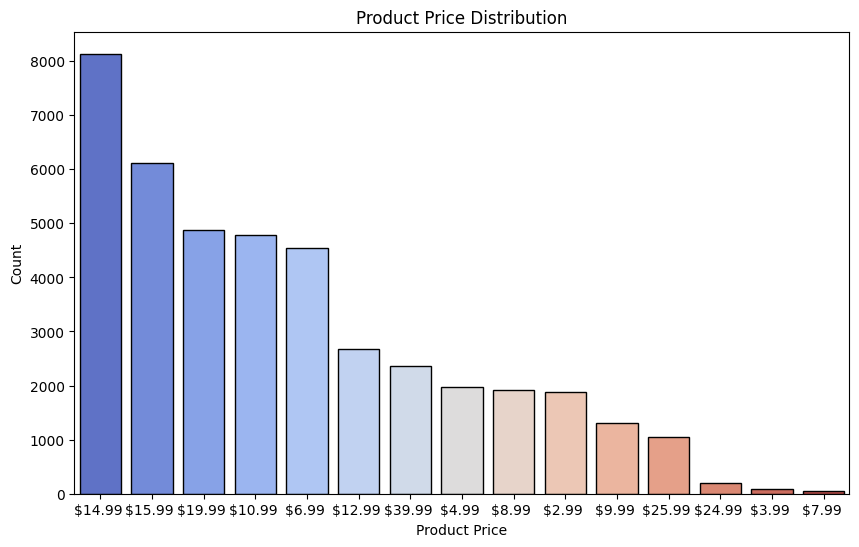

In [28]:
plt.figure(figsize = (10,6))

sns.barplot(df['Product_Price'].value_counts(), palette='coolwarm', edgecolor='black')

plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Count')
plt.show()

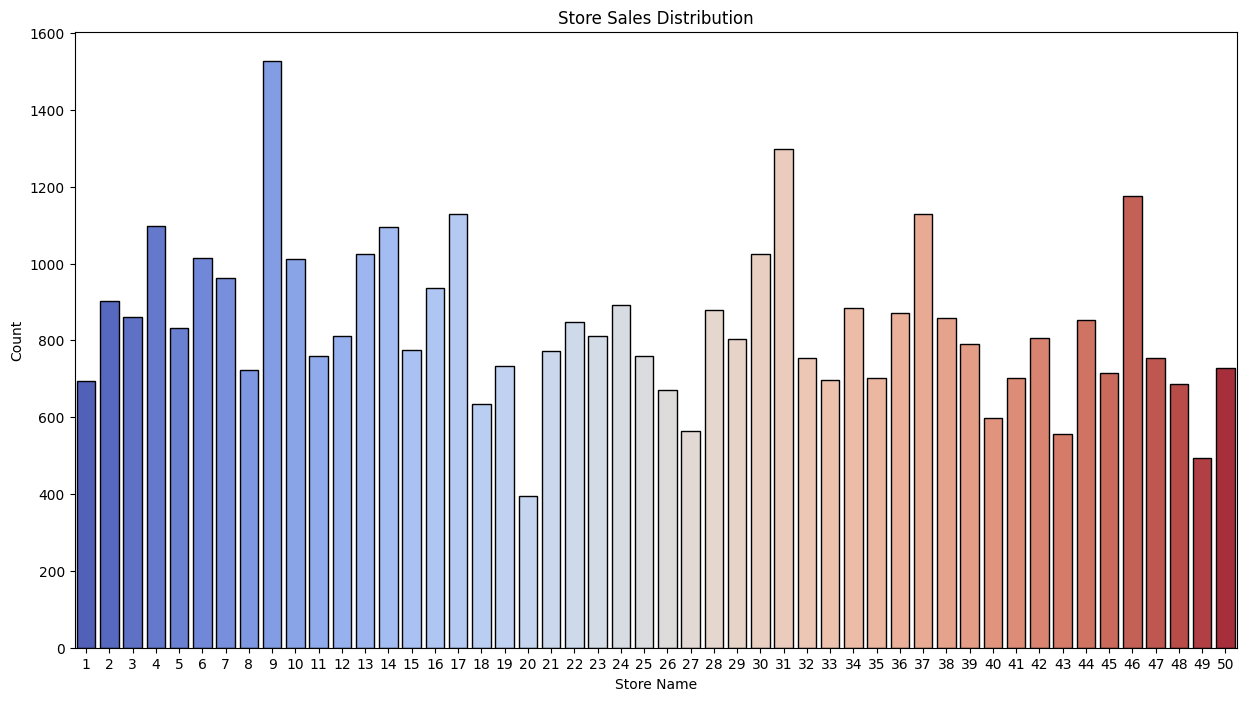

In [31]:
plt.figure(figsize = (15,8))

sns.barplot(df['Store_ID'].value_counts(), palette='coolwarm', edgecolor='black')

plt.title('Store Sales Distribution')
plt.xlabel('Store Name')
plt.ylabel('Count')
plt.show()